In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/dogs.csv')

In [3]:
data

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
feature_names = data.columns[1:]

In [5]:
feature_names

Index(['height', 'weight'], dtype='object')

In [6]:
X = data[feature_names]

In [7]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X)

MinMaxScaler()

In [11]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [12]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


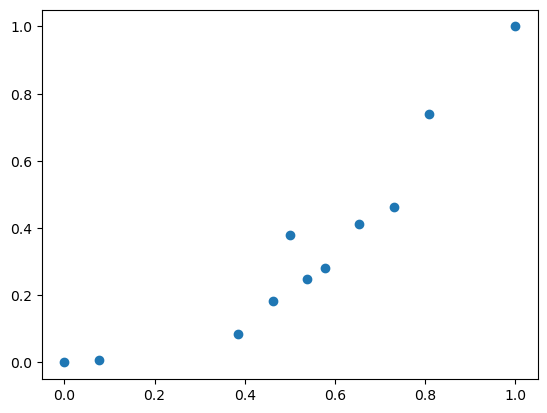

In [13]:
plt.scatter(X['height'], X['weight'])
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3, n_init='auto')

In [19]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [20]:
kmeans.cluster_centers_

array([[0.57692308, 0.32788671],
       [0.15384615, 0.03050109],
       [0.90384615, 0.86928105]])

In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [22]:
centroids

,height,weight
0,0.576923,0.327887
1,0.153846,0.030501
2,0.903846,0.869281


In [23]:
kmeans.labels_

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1], dtype=int32)

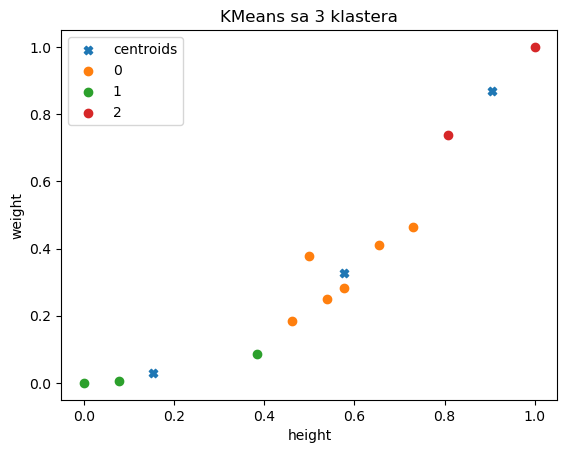

In [25]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.title('KMeans sa 3 klastera')
plt.legend()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [27]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [28]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centroids

,height,weight
0,0.153846,0.030501
1,0.658654,0.463235


In [29]:
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

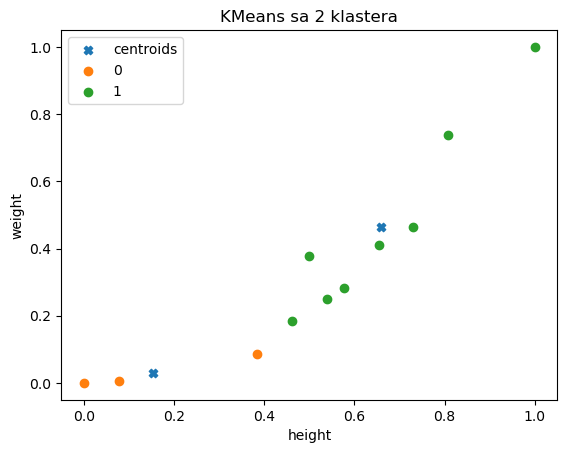

In [30]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.title('KMeans sa 2 klastera')
plt.show()

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
silhouette_samples(X, kmeans.labels_)

array([ 0.28981652,  0.242704  , -0.12137722,  0.53267774,  0.73560541,
        0.57851663,  0.56163616,  0.43579723,  0.40507931,  0.39309297,
        0.71035336])

In [33]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

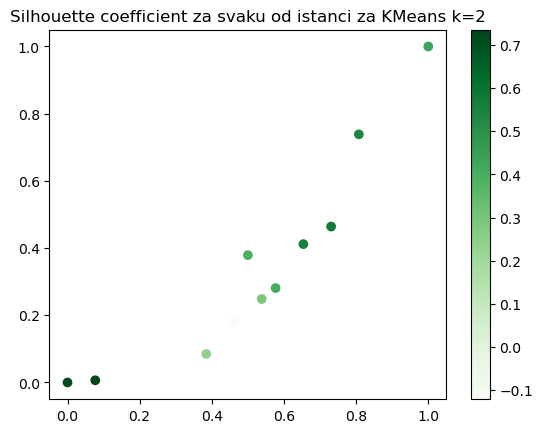

In [34]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficient za svaku od istanci za KMeans k=2')
plt.show()

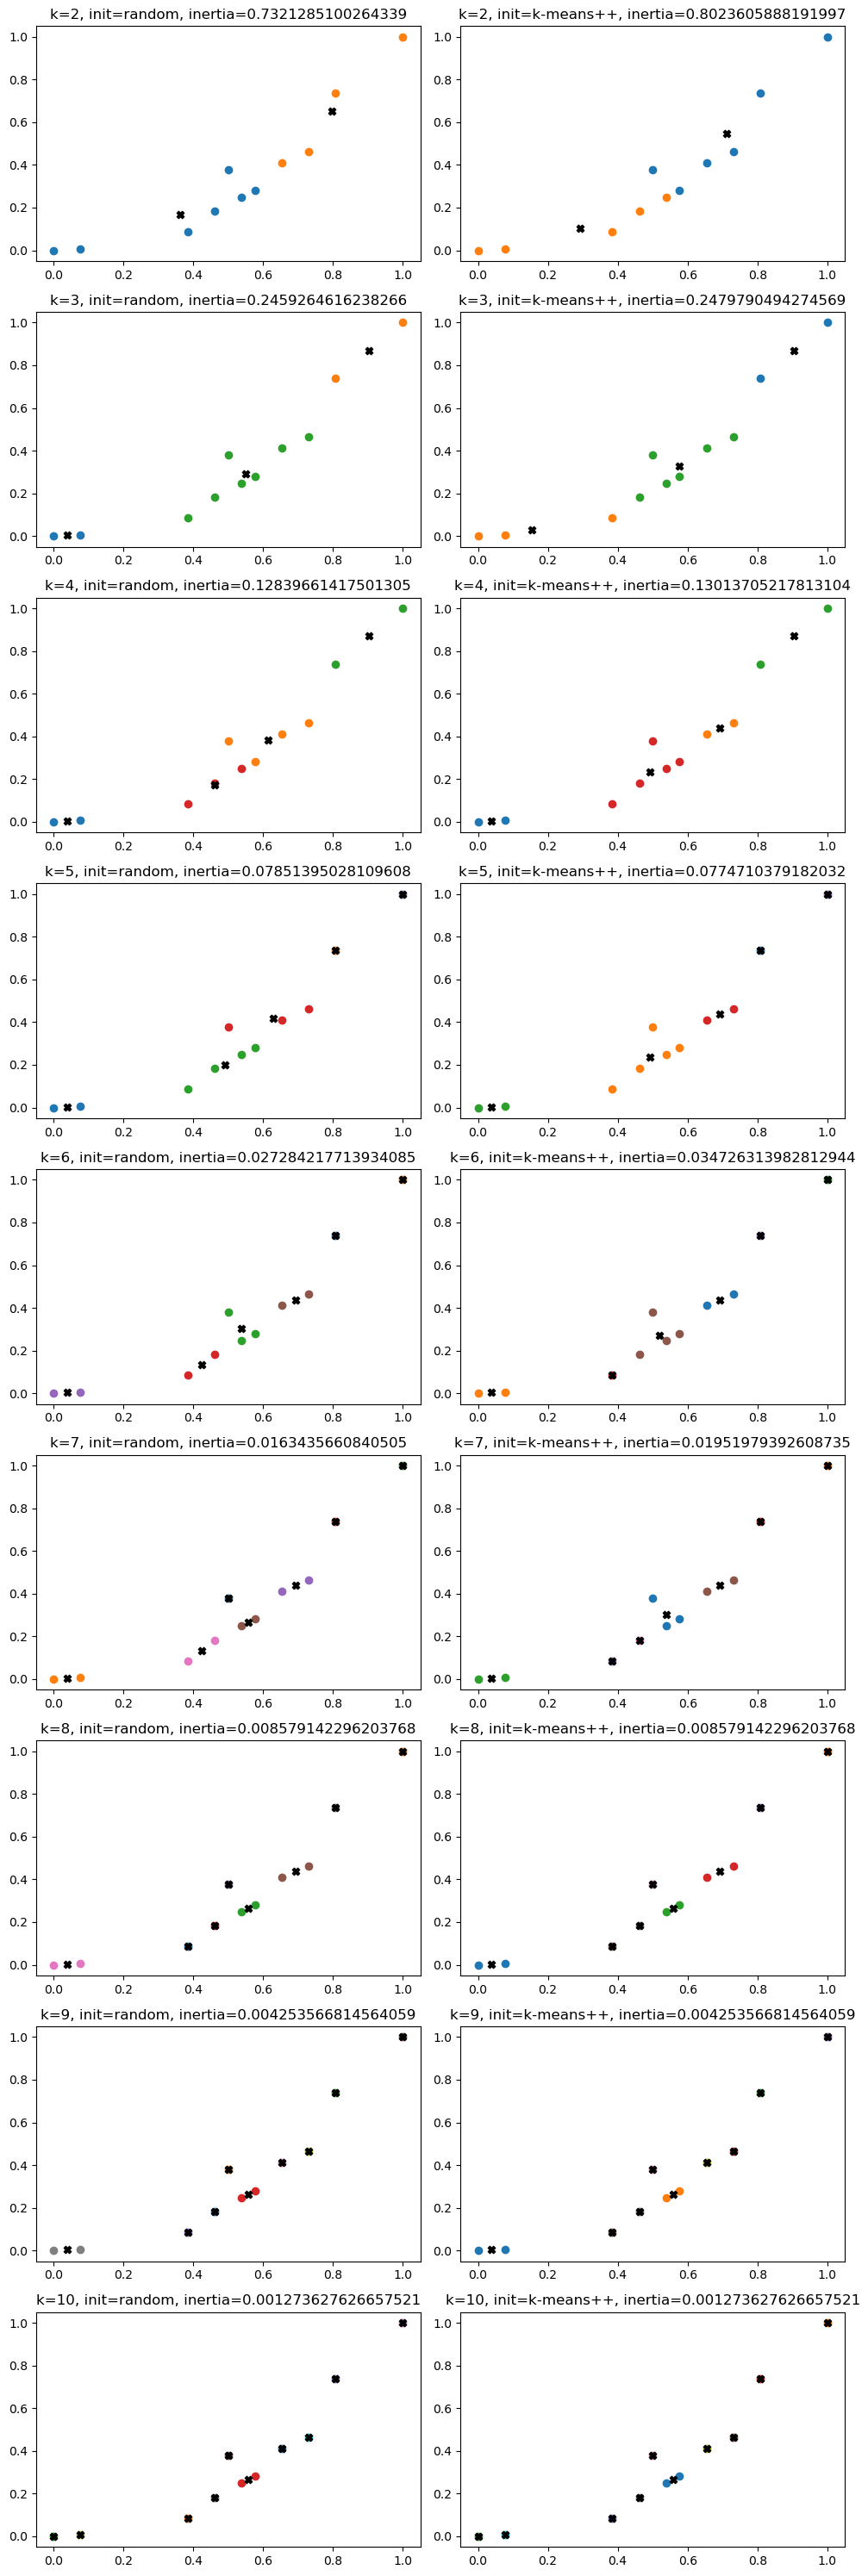

In [36]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        km = KMeans(n_clusters=k, init=init, n_init='auto')
        km.fit(X)
        
        if init == 'k-means++':
            silhouette.append(silhouette_score(X, km.labels_))
            inertias.append(km.inertia_)
            
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for c in np.unique(km.labels_):
            elems = X[km.labels_ == c]
            plt.scatter(elems['height'], elems['weight'], label=c)
            
        centers = pd.DataFrame(km.cluster_centers_, columns=feature_names)
        plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids', color='black')
    
        plt.title(f'k={k}, init={init}, inertia={km.inertia_}')
        
plt.tight_layout()

Text(0.5, 1.0, 'Silhouette coefficients')

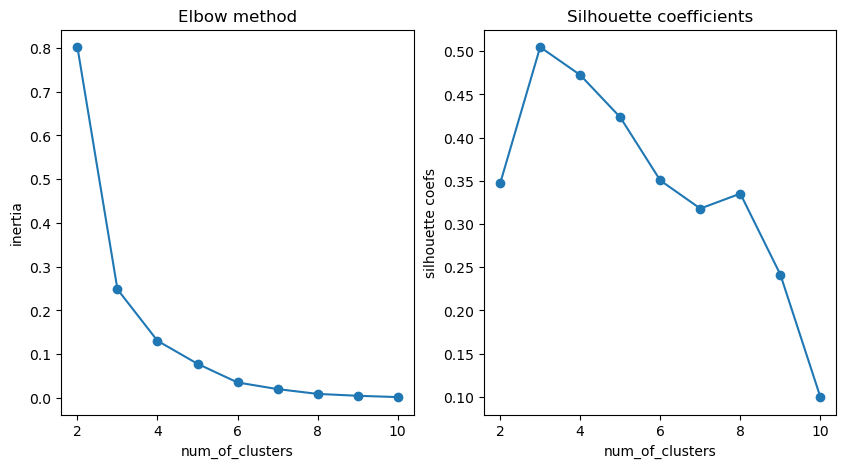

In [37]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('inertia')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('silhouette coefs')
plt.title('Silhouette coefficients')

In [38]:
# KOMPRESIJA SLIKE

In [39]:
from matplotlib.image import imread

In [40]:
import seaborn as sns

In [41]:
img = imread('../datasets/masa.jpg')

In [43]:
img_size = img.shape
img_size

(396, 396, 3)

In [44]:
X_img = img.reshape(img_size[0] * img_size[1], img_size[2])

In [45]:
kmeans = KMeans(n_clusters=30, n_init='auto')

In [46]:
kmeans.fit(X_img)

KMeans(n_clusters=30)

In [47]:
X_comp = kmeans.cluster_centers_[kmeans.labels_]

In [49]:
X_comp = np.clip(X_comp.astype('uint8'), 0, 255)

In [50]:
X_comp = X_comp.reshape(img_size[0], img_size[1], img_size[2])

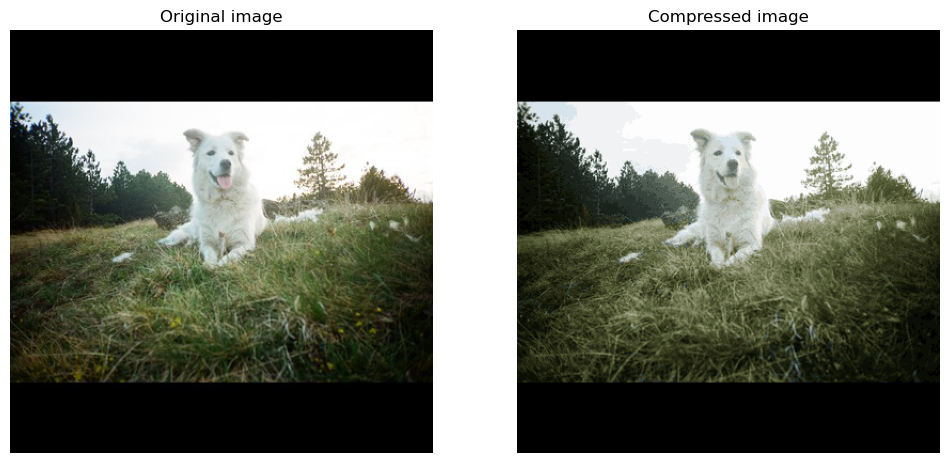

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_comp)
ax[1].set_title('Compressed image')

for ax in fig.axes:
    ax.axis('off')
    
plt.show()

In [53]:
img = imread('../datasets/masa.jpg')

In [54]:
img_size = img.shape
img_size

(396, 396, 3)

In [55]:
X_img = img.reshape(img_size[0]*img_size[1], img_size[2])

In [68]:
km = KMeans(n_clusters=70, n_init='auto')

In [69]:
km.fit(X_img)

KMeans(n_clusters=70)

In [70]:
X_comp = km.cluster_centers_[km.labels_]

In [71]:
X_comp = np.clip(X_comp.astype('uint8'), 0, 255)

In [72]:
X_comp = X_comp.reshape(img_size[0], img_size[1], img_size[2])

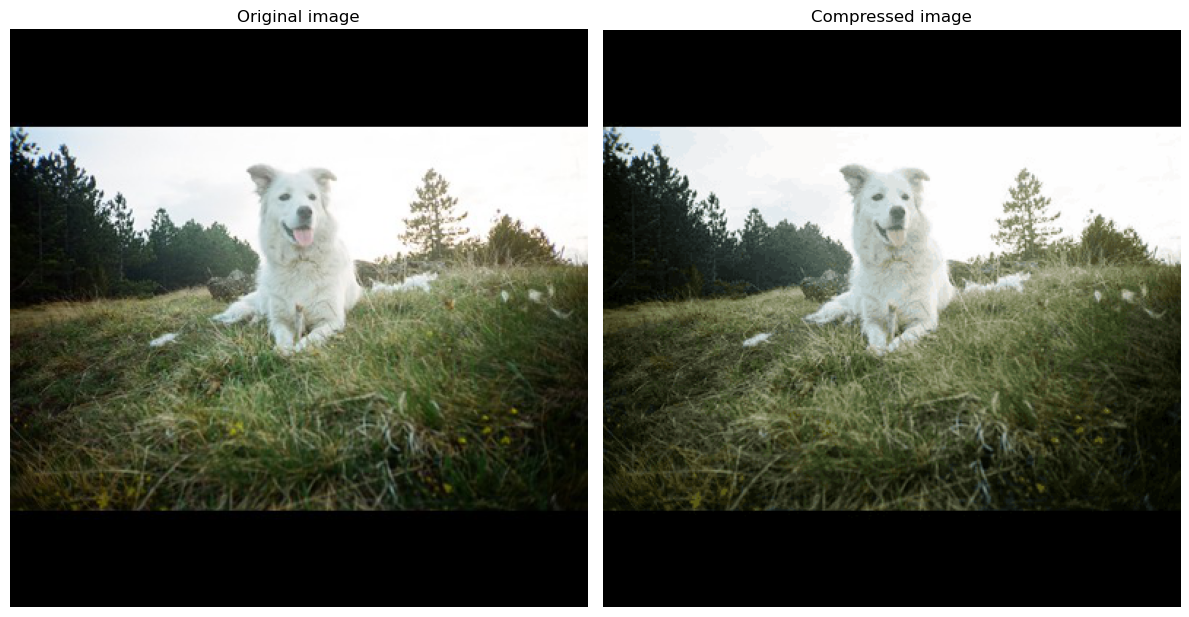

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_comp)
ax[1].set_title('Compressed image')

for ax in fig.axes:
    ax.axis('off')
    
plt.tight_layout()

In [74]:
# Bisecting KMeans

In [75]:
from sklearn.cluster import BisectingKMeans

In [76]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [77]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [82]:
def visualize(data, centers, labels, feature_names, alg_name):
    plt.scatter(centers[:,0], centers[:,1], marker='X', label='centers', color='black')
    
    for c in np.unique(labels):
        elems = data[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)
        
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'{alg_name} {len(centers)} clusters')
    plt.legend()

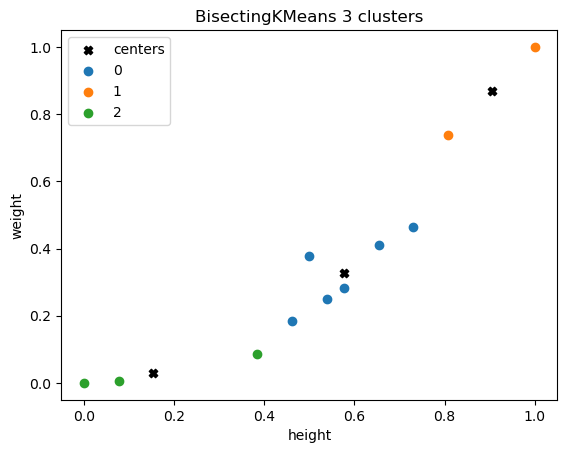

In [83]:
visualize(X, bkmeans.cluster_centers_, bkmeans.labels_, feature_names, 'BisectingKMeans')

In [84]:
from fcmeans import FCM

In [85]:
fcm = FCM(n_clusters=3, m=3)

In [86]:
fcm.fit(X.to_numpy())

In [88]:
labels = fcm.predict(X.to_numpy())

In [89]:
labels

array([0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1])

In [90]:
centers = fcm.centers
centers

array([[0.55558997, 0.30047223],
       [0.06538782, 0.01166019],
       [0.91434243, 0.87699131]])

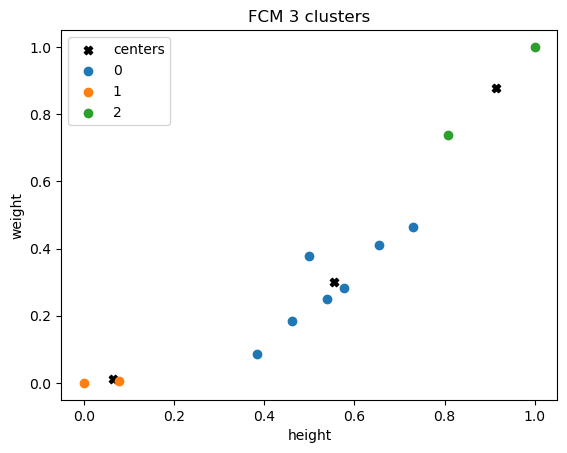

In [91]:
visualize(X, centers, labels, feature_names, 'FCM')

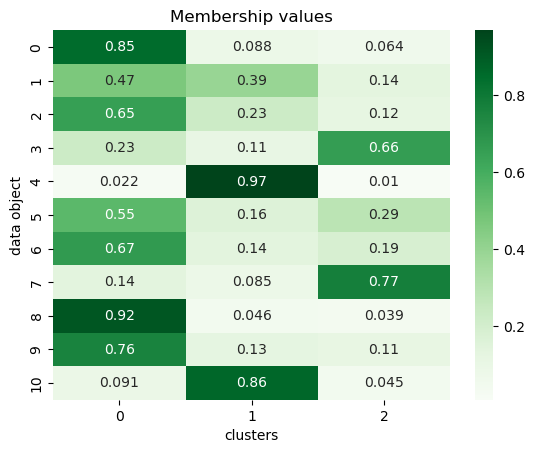

In [92]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership values')
plt.xlabel('clusters')
plt.ylabel('data object')
plt.show()